## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

'''import warnings
warnings.filterwarnings("ignore")'''

'import warnings\nwarnings.filterwarnings("ignore")'

In [2]:
df = pd.read_csv(r"stud.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## TO CHECK
1.Missing values 
2.Duplicates
3.Data Types
4.number of unique values in each column
5.statistics of data
6.various categories present in different column

In [3]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
#Basically returns true if same row is present
df.duplicated().sum()

0

In [5]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
print("Categories in the column gender: ",df["gender"].unique())
print("Categories in the column race_ethnicity: ",df["race_ethnicity"].unique())
print("Categories in the column parental_level_of_education: ",df["parental_level_of_education"].unique())
print("Categories in the column lunch: ",df["lunch"].unique(),  end =" ")
print("Categories in the column test_preparation_course: ",df["test_preparation_course"].unique())

Categories in the column gender:  ['female' 'male']
Categories in the column race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the column parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the column lunch:  ['standard' 'free/reduced'] Categories in the column test_preparation_course:  ['none' 'completed']


## Now let us see how many numerical and categorical features we have...

In [9]:
Numerical_Feature = [f for f in df.columns if df[f].dtype != 'O']
Categorical_Feature = [f for f in df.columns if df[f].dtype == 'O']

In [10]:
print("There are", len(Numerical_Feature), "Numerical Features and they are", Numerical_Feature)
print("There are", len(Categorical_Feature), "Numerical Features and they are", Categorical_Feature )

There are 3 Numerical Features and they are ['math_score', 'reading_score', 'writing_score']
There are 5 Numerical Features and they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding new columns

In [11]:
df["total_score"] = df["math_score"] + df["writing_score"] + df["reading_score"]

In [12]:
df["Average"] = df["total_score"]/3

In [13]:
#df.drop(columns = ["math_score", "reading_score","writing_score"], inplace = True)

## Diving deep with Data vizualization

In [14]:
df.sample(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
308,female,group B,associate's degree,free/reduced,none,53,71,67,191,63.666667
443,female,group B,associate's degree,standard,none,73,83,76,232,77.333333
756,male,group D,some college,standard,none,55,58,52,165,55.000000
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
225,female,group E,master's degree,free/reduced,none,45,56,54,155,51.666667
782,female,group B,high school,free/reduced,completed,76,85,82,243,81.000000
786,female,group E,some high school,free/reduced,none,72,79,77,228,76.000000
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208,69.333333
147,male,group C,associate's degree,free/reduced,none,73,68,66,207,69.000000
208,female,group B,some college,free/reduced,none,74,81,76,231,77.000000


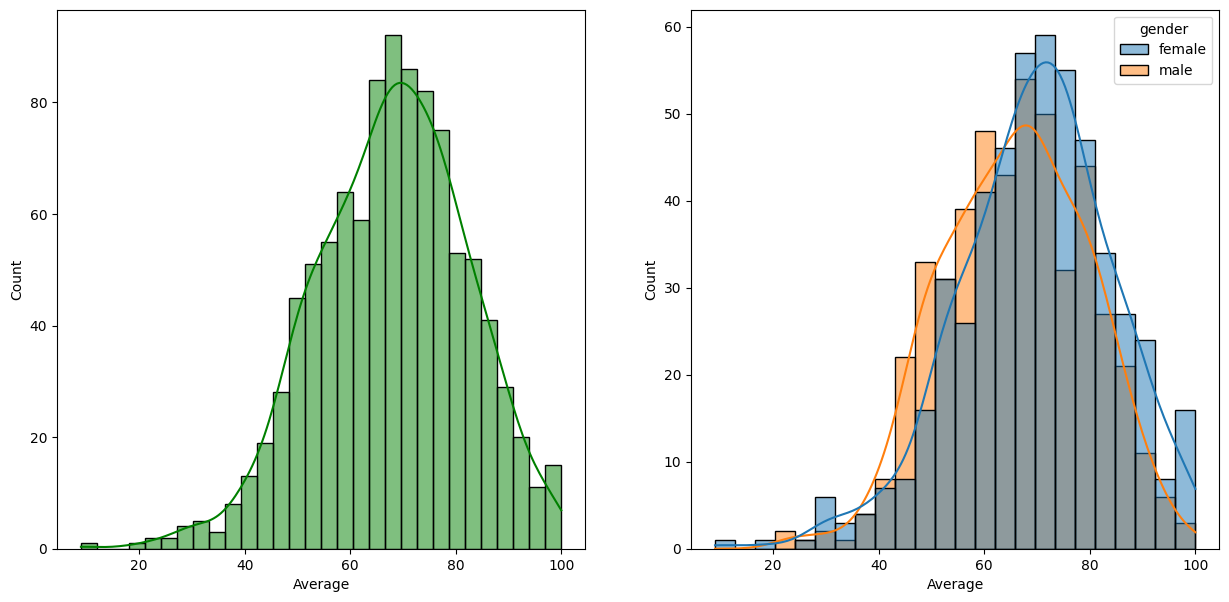

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
#bins=30 divides the data into 30 bins (intervals).
#kde=True adds a Kernel Density Estimate (KDE) curve, which is a smoothed version of the histogram.
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

## Females have high average marks compared to male students

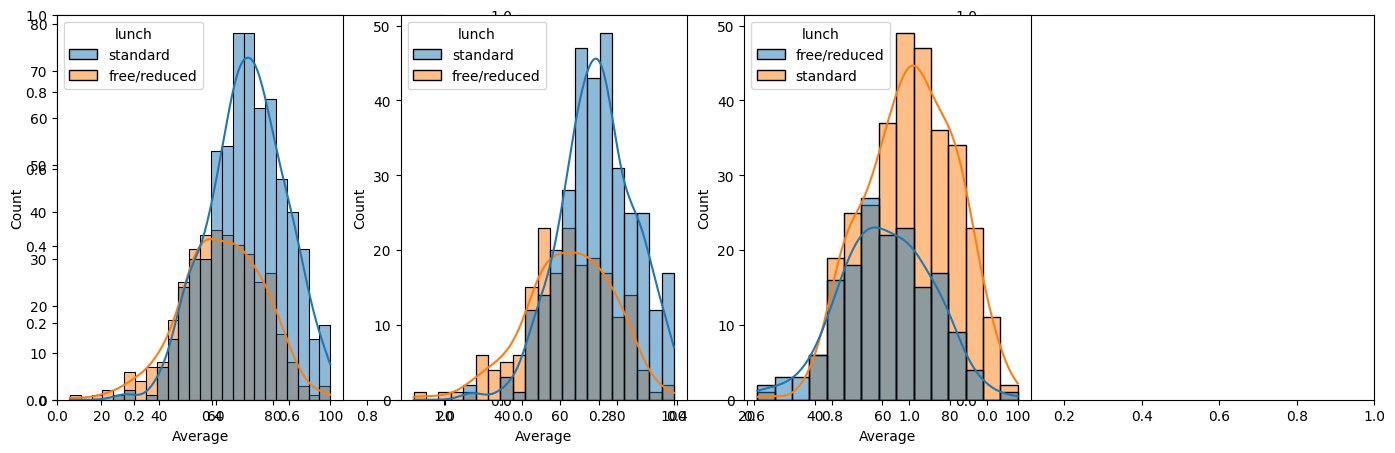

In [16]:
plt.subplots(1,3,figsize=(17,5))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()


## Students with standard lunch are performing well, both male and female

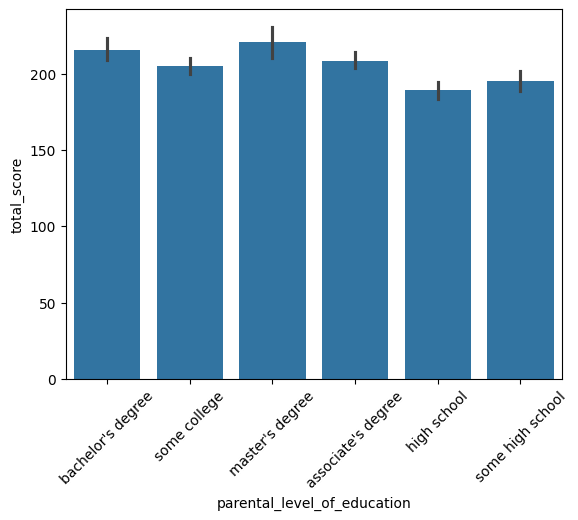

In [17]:
sns.barplot(x='parental_level_of_education', y='total_score', data = df)
plt.xticks(rotation =45)
plt.show()

## Candidates with masters degree has high average scores than others

C:\Users\elakk\AppData\Local\Temp\ipykernel_21016\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


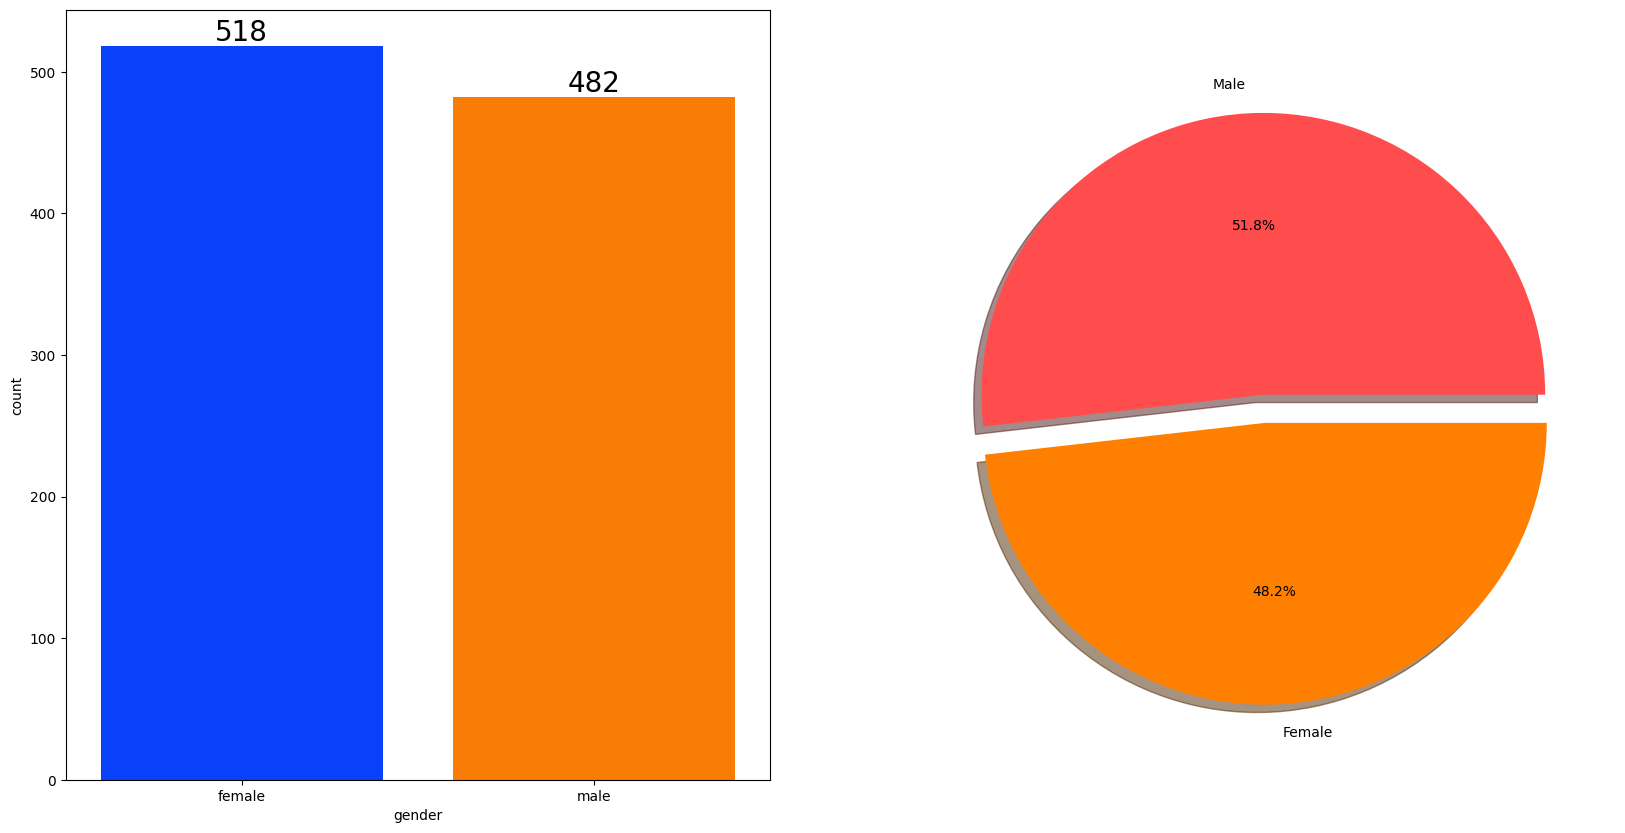

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Almost equal number of male and female students

C:\Users\elakk\AppData\Local\Temp\ipykernel_21016\827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\elakk\AppData\Local\Temp\ipykernel_21016\827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\elakk\AppData\Local\Temp\ipykernel_21016\827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

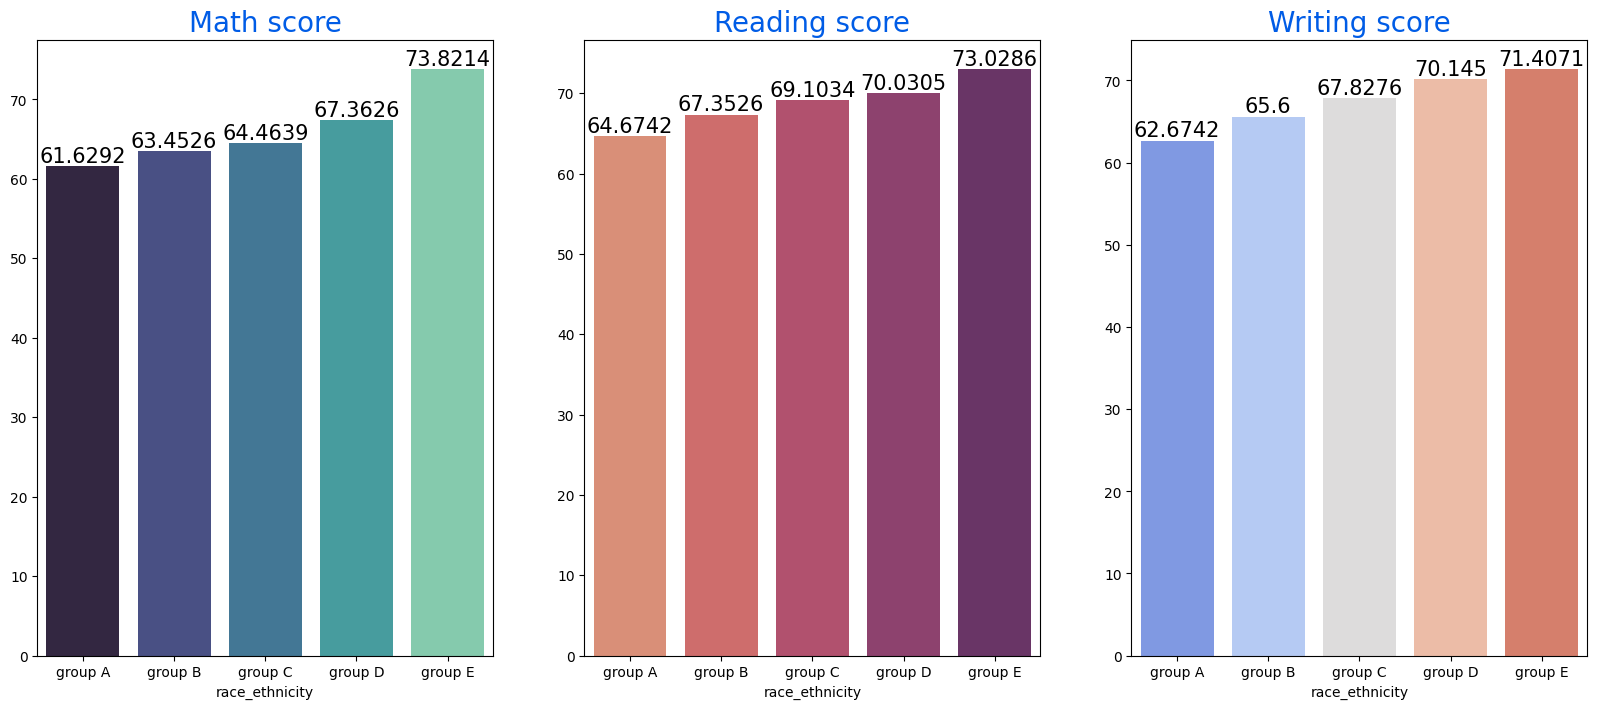

In [20]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)